In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 100              #(number of stars)
Rmax = 50000         #(AU)
#Defalut units also include Mass in solar masses, distances in AU.
X = np.zeros(N)
Y = np.zeros(N)
Z = np.zeros(N)

Vx = np.zeros(N)
Vy = np.zeros(N)
Vz = np.zeros(N)

In [2]:
i = 0
while i < N:
    x = np.random.uniform(-Rmax,Rmax)
    y = np.random.uniform(-Rmax,Rmax)
    z = np.random.uniform(-Rmax,Rmax)
    if np.sqrt(x**2+y**2+z**2) < Rmax:
        X[i] = x    
        Y[i] = y
        Z[i] = z
        i = i + 1 
for i in range(0,N): #velocities between 0 and 1.
    Vx[i] = np.random.uniform(0,1)
    Vy[i] = np.random.uniform(0,1)
    Vz[i] = np.random.uniform(0,1)

In [3]:
# giving cluster mass 
Mass = np.zeros(N)

for i in range(0,N):
    Mass[i] = 0.2    #Creating all stars with 0.2Solar masses 

### Calculating energy balance

Using the following equation:

In [4]:
# caclulating the energy balance of the system
G = 6.67E-11 #SI units!
M_sol = 1.99E30
AU = 1.49E11
PE_tot = 0
for k in range(1,N): #note since 0 is the begining of the index.
    for j in range(0,k-1):
        R_res = np.sqrt((X[k]-X[j])**2 + (Y[k]-Y[j])**2 + (Z[k]-Z[j])**2)
        PE_tot += (G * Mass[j]*M_sol**2*Mass[k])/(R_res*AU)

In [5]:
print('Potential Energy',PE_tot) # units of mass in M_sol and R in AU.

Potential Energy 8.351542262615696e+36


In [6]:
# Calcuating Kinetic Energy
Ek_tot = 0
for i in range(0,N):
    Ek_tot += 0.5 * Mass[i] *M_sol* (np.sqrt(Vx[i]**2 + Vy[j]**2 + Vz[i]**2))**2 #V_res

In [7]:
print('Kinetic Energy: ',Ek_tot) #without scaled v.

Kinetic Energy:  1.3488944936130815e+31


In [8]:
q = 1 # desierd energy ratio.
a = np.sqrt((2*q*PE_tot)/(Ek_tot))

In [9]:
print('A',a,'ms-1') 

A 1112.7800948984452 ms-1


Note: when converting this into Kms-1 (dividing by 149597900) the speeds are around ~8kms-1 which is reasonable to the calculatings must be right.

In [10]:
# multiplying each velocity vector with the calculated constant for desired q.
Vx_a = Vx*a 
Vy_a = Vy*a 
Vz_a = Vz*a 

### Graphing Our clusters

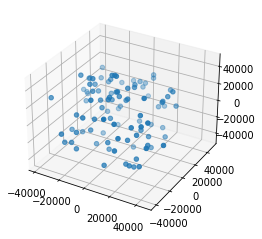

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X,Y,Z)
plt.show()